# Insufficient Sleep 


# Exploratory data analysis and visualization

## Behavioral Risk Factor Surveillance System (BRFSS)  





Let's start importing some usefull libraries and settings:


In [198]:
%matplotlib inline 
import csv
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

mpl.rcParams['figure.figsize'] = (6.0, 10.0)

sns.set_context("notebook")
sns.set()
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("Set2", 10))

style.use('fivethirtyeight')

# Loading data

The data load performs basically two data selection operations:

- **"df_YYYY"** dataframe: first, it loads the  datasets, one per year, prepared in the previous [notebook](1_BRFSS_DataPreparation.ipynb).

They contains the same number of record of the original BRFSS survey (without records with "SLEPTIM1" >) 25) and just the columns I need for my analysis.

- **"final"** dataframe: the concatenation of the "df_YYYY" dataframes

- **"df_YYY_short_sleep"** dataframe: a filtered dataframe just with records from "Short sleep" people (with the "sleepH" field <7)

- **final_short_sleep**: the concatenation of the "df_YYY_short_sleep" dataframes

Importan note: The series **"SLEEP"** is a Boolean. 

 - True: if SLEPTIM1 (How Much Time Do You Sleep?) >= 7 hours (sufficient sleep)

 - False: if SLEPTIM1 (How Much Time Do You Sleep?) < 7 hours (short sleep staus, insufficient sleep)




In [199]:
#datasets available
years = ["2013","2014","2016"] 
#labels for States dimension
reader = csv.reader(open('./data/states.csv', 'r'))
d_states = {}
for row in reader:
        k, v = row
        d_states[v] = k

#labels for Sleep sub dimensions
labels_sleep_legend = ["Short sleep","Sufficient Sleep"]

In [200]:
# replace with a for loop 
df_2016 = pd.read_csv('./data/brfss2016clean.csv',sep='\t', header=0,  dtype='category')
df_2016['y'] = '2016'
df_2016.head()
print("# 2016 Number of rows:", len(df_2016))

# 2016 Number of rows: 480577


In [201]:
df_2014 = pd.read_csv('./data/brfss2014clean.csv',sep='\t', header=0,  dtype='category')
df_2014['y'] = '2014'
df_2014.head()
len (df_2014)
print("# 2014 Number of rows:", len(df_2014))

# 2014 Number of rows: 458172


In [202]:
df_2013 = pd.read_csv('./data/brfss2013clean.csv',sep='\t', header=0,  dtype='category')
df_2013['y'] = '2013'
df_2013.head()
len (df_2013)
print("# 2013 Number of rows:", len(df_2013))

# 2013 Number of rows: 484401


## Full dataset: "final" dataframe

Let's concat all dataframes in a single one to facilitate further analysis.

In [203]:
allDf = [df_2013,df_2014,df_2016]
final = pd.concat(allDf)
print("# Final - Number of rows:", len(final))

# Final - Number of rows: 1423150


In [204]:
#Check data
final.groupby('y').size()

y
2013    484401
2014    458172
2016    480577
dtype: int64

## Dataset filtered on "short sleep" entries: 

It is important to note that while the broad population 2016 is approximately 480.000 samples, the "Short sleep" segment from BRFSS yields 153.523 samples. Please see below the table for every years.

#### Final full years short_sleep:

In [205]:
final_short_sleep= final[final['sleep'] == 'False'] #filter to only rows where sleep == True

#### 2016 short sleep dataset:

In [206]:
df_2016_short_sleep= df_2016[df_2016['sleep'] == 'False'] #filter to only rows where sleep == True

#### 2014 short sleep dataset:

In [207]:
df_2014_short_sleep= df_2014[df_2014['sleep'] == 'False'] #filter to only rows where sleep == True

#### 2013 short sleep dataset:

In [208]:
df_2013_short_sleep= df_2013[df_2013['sleep'] == 'False'] #filter to only rows where sleep == True

# Exploring  dataset - Demographics metrics

Looking to the following chart (based on the 2016 BRFSS Dataset) we can find some insights about people with Short sleep or Sufficient Sleep. 

We are dealing with Categorical data, because of that a common technique used to analyze categorical data is to use Frequency tables

## Gender : 

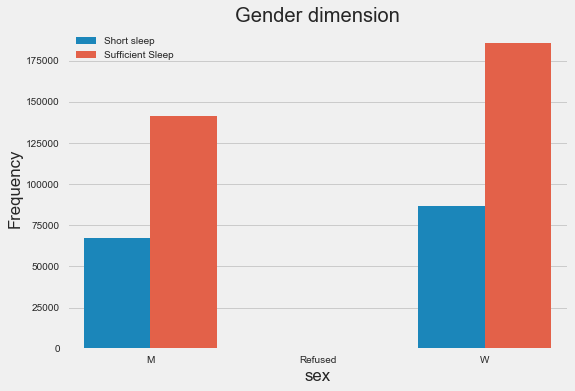

In [209]:
ax = sns.countplot(x="sex", hue="sleep", data=df_2016)
ax.set_title("Gender dimension")
ax.set_ylabel("Frequency")
ax.legend(labels=labels_sleep_legend)

## Age:

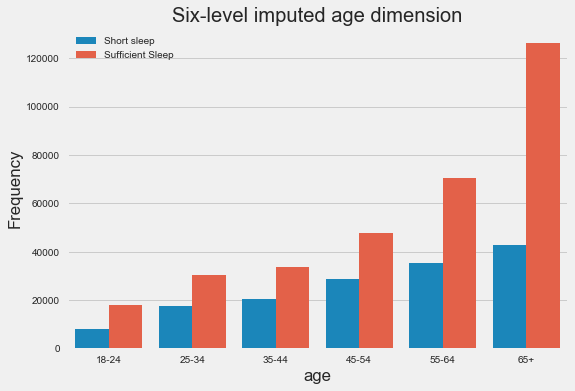

In [210]:
ax = sns.countplot(x="age", hue="sleep", data=df_2016)
ax.set_title("Six-level imputed age dimension")
ax.set_ylabel("Frequency")
ax.legend(labels=labels_sleep_legend)

## Race:

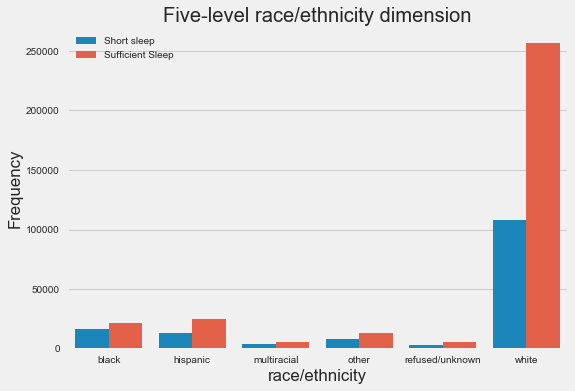

In [211]:
ax = sns.countplot(x="race", hue="sleep", data=df_2016)
ax.set_title("Five-level race/ethnicity dimension")
ax.set_ylabel("Frequency")
ax.set_xlabel("race/ethnicity")
ax.legend(labels=labels_sleep_legend)

## Education:

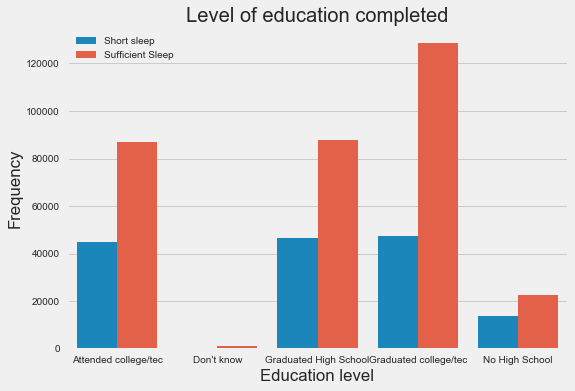

In [212]:
ax = sns.countplot(x="education", hue="sleep", data=df_2016)
ax.set_title("Level of education completed")
ax.set_ylabel("Frequency")
ax.set_xlabel("Education level")
ax.legend(labels=labels_sleep_legend)

## Income: 

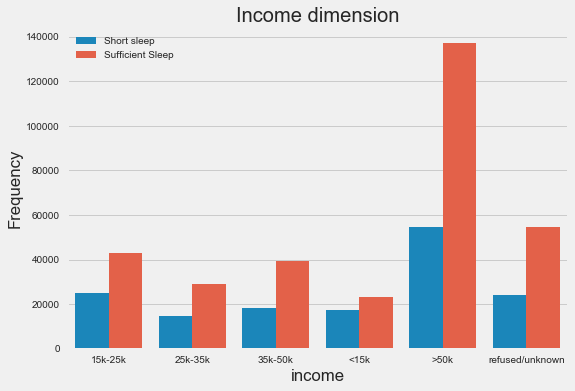

In [213]:
ax = sns.countplot(x="income", hue="sleep", data=df_2016)
ax.set_title("Income dimension")
ax.set_ylabel("Frequency")
ax.legend(labels=labels_sleep_legend)

# Exploring  dataset - Health metrics

## Health

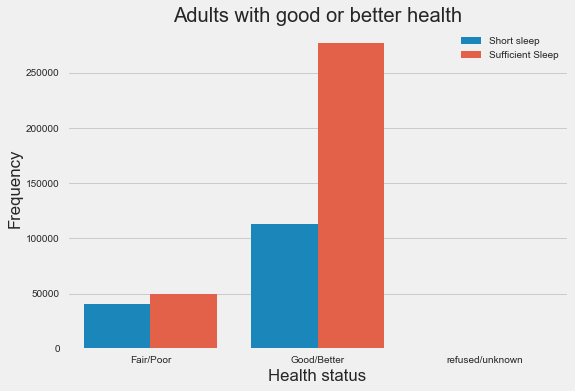

In [214]:
ax = sns.countplot(x="health", hue="sleep", data=df_2016)
ax.set_title("Adults with good or better health")
ax.set_ylabel("Frequency")
ax.set_xlabel("Health status")
ax.legend(labels=labels_sleep_legend)

## BMI - Body Mass Index

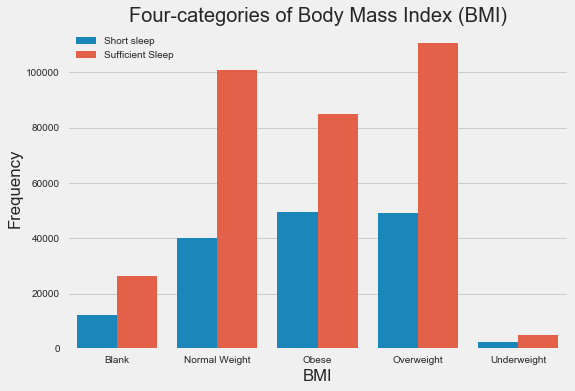

In [215]:
ax = sns.countplot(x="bmi", hue="sleep", data=df_2016)
ax.set_ylabel("Frequency")
ax.set_title("Four-categories of Body Mass Index (BMI)")
ax.set_xlabel("BMI")
ax.legend(labels=labels_sleep_legend)

## Adult Smokers

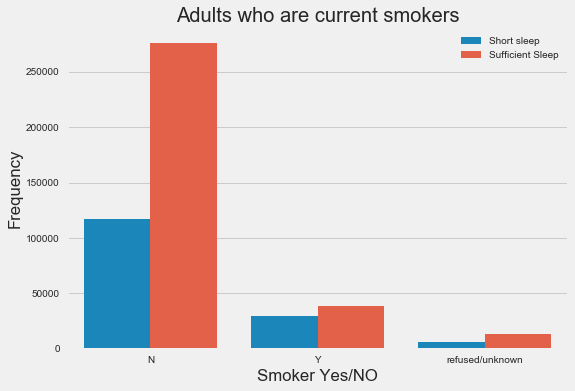

In [216]:
ax = sns.countplot(x="smoker", hue="sleep", data=df_2016)
ax.set_ylabel("Frequency")
ax.set_xlabel("Smoker Yes/NO")
ax.set_title("Adults who are current smokers")
ax.legend(labels=labels_sleep_legend)

## Physical activity

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (yes, no)

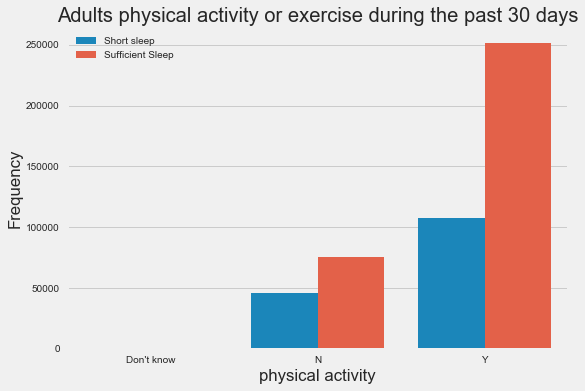

In [217]:
ax = sns.countplot(x="physical_activity", hue="sleep", data=df_2016)
ax.set_ylabel("Frequency")
ax.set_xlabel("physical activity")
ax.set_title("Adults physical activity or exercise during the past 30 days")
ax.legend(labels=labels_sleep_legend)

# Short Sleep Duration Among US Adults
## Sleep Hours per night 

### On average, how many hours of sleep do you get in a 24-hour period?

For the general population, we have the following reported sleep distributions:

- The distributions are calculated using the 2016/2014/2013 dataset (480.577/458.172/484.401 people).

- The majority of males and females both sleep between 7 and 8 hours per day.

- The mean is the same for every year: 7.05 hours

- The STD is 1.49 for 2016, 1.46 for 2014, 1.47 for 2013.



MEAN:  7.05
STD:  1.49


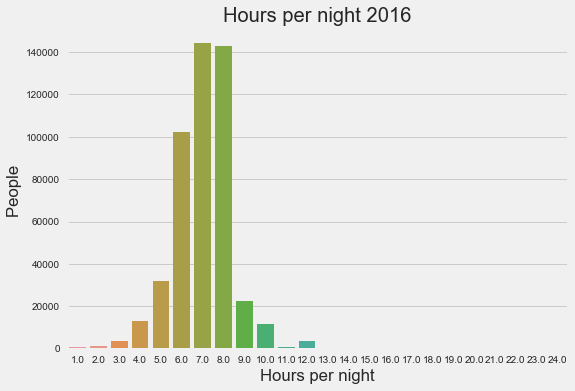

In [218]:
df_2016['sleepH']= df_2016['sleepH'].astype(float)
mean = round(df_2016['sleepH'].mean(),2)
std = round(df_2016['sleepH'].std(),2)
print ("MEAN: ", mean)
print ("STD: ", std)

sleep_hour_distro = sns.countplot(x="sleepH", data=df_2016)
sleep_hour_distro.set_xlabel("Hours per night")
sleep_hour_distro.set_ylabel("People ")

sleep_hour_distro.set_title("Hours per night 2016")

MEAN:  7.07
STD:  1.43


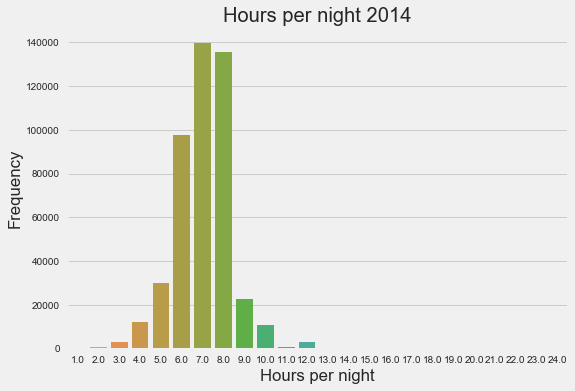

In [219]:
df_2014['sleepH']= df_2014['sleepH'].astype(float)
mean = round(df_2014['sleepH'].mean(),2)
std = round(df_2014['sleepH'].std(),2)
print ("MEAN: ", mean)
print ("STD: ", std)

sleep_hour_distro = sns.countplot(x="sleepH", data=df_2014)
sleep_hour_distro.set_xlabel("Hours per night")
sleep_hour_distro.set_ylabel("Frequency")
sleep_hour_distro.set_title("Hours per night 2014")

MEAN:  7.05
STD:  1.47


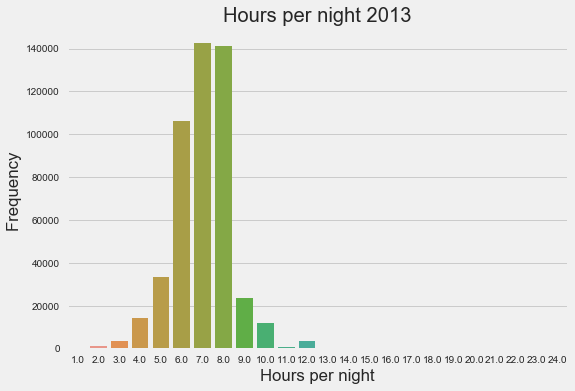

In [220]:
df_2013['sleepH']= df_2013['sleepH'].astype(float)
mean = round(df_2013['sleepH'].mean(),2)
std = round(df_2013['sleepH'].std(),2)
print ("MEAN: ", mean)
print ("STD: ", std)

sleep_hour_distro = sns.countplot(x="sleepH", data=df_2013)
sleep_hour_distro.set_xlabel("Hours per night")
sleep_hour_distro.set_ylabel("Frequency ")
sleep_hour_distro.set_title("Hours per night 2013")

# Short sleep by year

In [221]:
final['sleep'] = final['sleep'].astype('object')
final['y'] = final['y'].astype('object')
final['sex'] = final['sex'].astype('object')

In [222]:
final_y= final.groupby(['y','sleep']).size().unstack().reset_index()
final_y['Tot'] =  final_y['False'] + final_y['True']
final_y['% short sleep'] =  final_y['False'] / final_y['Tot']
final_y = final_y[['y','% short sleep']]

In [223]:
final_y.set_index('y')

sleep,% short sleep
y,
2013,0.327489
2014,0.315150
2016,0.319456


In [224]:
final.groupby(['y','sleep']).size()

y     sleep
2013  False    158636
      True     325765
2014  False    144393
      True     313779
2016  False    153523
      True     327054
dtype: int64

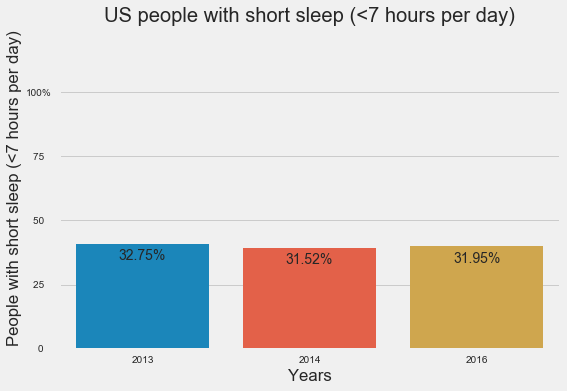

In [225]:
bar_plot = sns.barplot(x=final_y["y"],y=final_y["% short sleep"])
bar_plot.set_xlabel("Years")
bar_plot.set_ylabel("People with short sleep (<7 hours per day)")
bar_plot.set_title("US people with short sleep (<7 hours per day)")
bar_plot.set_yticklabels(labels = ['0   ', '25   ', '50   ', '75   ','100%'])
bar_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#Insert % labels on top
barwidth = [0.8, 0.8, 0.8, 0.8]
bar_plot.set_ylim(0, 1)

label_ = final_y['% short sleep']
for bar,newwidth, label in zip(bar_plot.patches,barwidth, label_):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    centre = x + width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
    bar_plot.text(x+width/2., height - 0.05,  '{0:4.2f}'.format(label*100)+"%", ha="center") 
   

### A third of US adults report that they usually sleep less than the recommended amount of sleep. 


In **2013**, 32.75% of US States adults reported usually sleeping <7 hours in a 24- hour period.

In **2014**, 31.52% of US States adults reported usually sleeping <7 hours in a 24- hour period.

In **2016**, 31.95% of US States adults reported usually sleeping <7 hours in a 24- hour period.



#  Short Sleep Among US States

## Which is the country with the highest percentage of "short sleep" people?


**NOTE**: 

Aggregating BRFSS state samples for national estimates without accounting for state-level sampling, it's practice that can introduce bias because the weighted distributions of the state samples do not always adhere to national demographic distributions.  
(see below for states like Guam, U.S. Virgin Islands, Hawaii)

Reference: 
- [National weighting of data from the Behavioral Risk Factor Surveillance System (BRFSS)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5109644/)
- [Comparability of Data BRFSS 2016](https://www.cdc.gov/brfss/annual_data/2016/pdf/compare_2016.pdf) 
- [Comparability of Data BRFSS 2014](https://www.cdc.gov/brfss/annual_data/2016/pdf/compare_2014.pdf) 
- [Comparability of Data BRFSS 2013](https://www.cdc.gov/brfss/annual_data/2016/pdf/compare_2014.pdf) 

Assuming that the National weighting of data from the BRFSS 2016 is correct, I tried to figure out some insights:

In [226]:
final['state'] = final['state'].astype('object')

final_y = final[['sleep','y','state']]
final_y= final.groupby(['y','state','sleep']).size().unstack().reset_index()
final_y['Tot'] =  final_y['False'] + final_y['True']

# % of people with sleep disorder
final_y['% short sleep'] =  round(final_y['False'] / final_y['Tot']*100,2)
final_y = final_y[['y','state','% short sleep']]

### Short sleep: 2016 Top 10 Worst US State 

In [227]:
final_y['label'] = final_y['state'].map(d_states)
final_y[final_y['y'] == '2016'].sort_values(['y', '% short sleep'], ascending=[1, 0]).nlargest(10, '% short sleep').set_index(['label'])

sleep,y,state,% short sleep
label,,,
Guam,2016,GU,50.83
U.S. Virgin Islands,2016,VI,40.34
Hawaii,2016,HI,40.02
Puerto Rico,2016,PR,39.19
West Virginia,2016,WV,38.26
Kentucky,2016,KY,37.23
Alabama,2016,AL,36.99
New Jersey,2016,NJ,36.79
District of Columbia,2016,DC,36.21


### Short sleep: 2014 Top 10 Worst US State 

In [228]:
final_y[final_y['y'] == '2014'].sort_values(['y', '% short sleep'], ascending=[1, 0]).nlargest(10, '% short sleep').set_index(['label'])

sleep,y,state,% short sleep
label,,,
Guam,2014,GU,48.83
Hawaii,2014,HI,40.29
Puerto Rico,2014,PR,37.62
Kentucky,2014,KY,36.71
Alabama,2014,AL,36.59
New Jersey,2014,NJ,36.02
Georgia,2014,GA,35.93
New York,2014,NY,35.88
West Virginia,2014,WV,35.52


### Short sleep: 2013 Top 10 Worst US State 

In [229]:
final_y[final_y['y'] == '2013'].sort_values(['y', '% short sleep'], ascending=[1, 0]).nlargest(10, '% short sleep').set_index(['label'])

sleep,y,state,% short sleep
label,,,
Guam,2013,GU,47.15
Kentucky,2013,KY,39.90
Hawaii,2013,HI,39.32
West Virginia,2013,WV,39.00
New Jersey,2013,NJ,38.31
Puerto Rico,2013,PR,38.31
New York,2013,NY,38.11
Ohio,2013,OH,37.71
Georgia,2013,GA,36.54


![Map Short Sleep](./img/MapShortSleep.png)

## Short sleep and worst US States

Beside the note about the National weighting of data (and excluding Guam and Hawaii), it's interesting to look at the data and find out that the Worst US states for "short sleep" are located in the East part of the country. 

It would be interesting to go deeply and understand why and if there are some geographical correlations.

# Short sleep and Gender

Let's analize the distributions between gender and short sleep. 

We will discover that they are pretty similar. No significant difference between groups

In [230]:
final_y_tot= final.groupby(['y','sex','sleep']).size().unstack().reset_index()
final_y_tot['Tot']  =  final_y_tot['False'] + final_y_tot['True']
final_y_tot['% short sleep'] =  round(final_y_tot['False'] / final_y_tot['Tot']*100,2)
final_y_tot['% sleep ok'] =  round(final_y_tot['True'] / final_y_tot['Tot']*100,2)
#final_y_tot.set_index('y')

In [231]:
final_y_tot=final_y_tot[['y','sex','% short sleep','% sleep ok']]

In [232]:
final_2016_tot = final_y_tot[(final_y_tot['y'] == '2016') & (final_y_tot['sex'] != 'Refused')]
#final_2016_tot.set_index('sex')
final_2016_tot

sleep,y,sex,% short sleep,% sleep ok
4,2016,M,32.14,67.86
6,2016,W,31.80,68.20


([<matplotlib.axis.YTick at 0x11f84b1d0>,
 <a list of 2 Text yticklabel objects>)

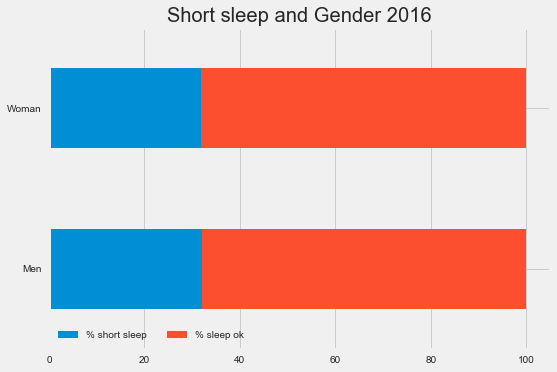

In [233]:
final_2016_tot.plot(kind="barh", stacked=True);
plt.legend(loc=3, ncol=3)
plt.title("Short sleep and Gender 2016")
plt.yticks([1, 0], ['Woman', 'Men'])

In [234]:
final_2014_tot = final_y_tot[final_y_tot['y'] == '2014']
final_2014_tot

sleep,y,sex,% short sleep,% sleep ok
2,2014,M,31.80,68.20
3,2014,W,31.31,68.69


In [235]:
#final_2014_tot.plot(kind="barh", stacked=True);
#plt.legend(loc=3, ncol=3);
#plt.title("Short sleep and Gender 2014")

In [236]:
final_2013_tot = final_y_tot[final_y_tot['y'] == '2013'].set_index(['sex'])
final_2013_tot

sleep,y,% short sleep,% sleep ok
sex,,,
M,2013,32.99,67.01
W,2013,32.58,67.42


In [237]:
#final_2013_tot.plot(kind="barh", stacked=True);
#plt.legend(loc=3, ncol=3);
#plt.title("Short sleep and Gender 2013")

# Short sleep with health risk factors 

Let's figure out if people with health risk factors sleep less and potential pairwise relationship that might exist between any pair among the 4 variables listed below. 

Categorical data is a problem for most algorithms in machine learning.


It would be helpful and time saving to map the correlation using a Scatter Plot Matrix - Feature feature relationships but we are dealing with categorical data. 

I can’t fit categorical variables into a regression equation in their raw form. They must be treated. I can combine levels to avoid redundant levels in a categorical variable, use Dammy code method (OneHotEncoder)

In our dataset we have four dimensions about health:

- Health status: Fair/poor

- Smoker: Y

- BMI: Obese or Overweight

- Physical activity or exercise during the past 30 days: N


NOTE: I consider just data from 2016. 


In [238]:
df_2016.head()

,age,bmi,education,employment,health,income,physical_activity,race,sex,sleepH,smoker,state,sleep,y
0,35-44,Normal Weight,Graduated High School,Employed,Good/Better,25k-35k,Y,white,M,5.0,N,AL,False,2016
1,55-64,Overweight,Graduated High School,Homemaker,Good/Better,>50k,Y,white,W,6.0,N,AL,False,2016
2,65+,Normal Weight,Attended college/tec,Retired,Good/Better,>50k,Y,white,W,9.0,Y,AL,True,2016
3,65+,Overweight,Graduated college/tec,Retired,Good/Better,>50k,Y,white,M,7.0,N,AL,True,2016
4,18-24,Normal Weight,Graduated High School,Employed,Fair/Poor,refused/unknown,Y,white,M,6.0,N,AL,False,2016


## Obese or Overweight, Smoker and No physical activity

In [239]:
bmi = ['Overweight', 'Obese']
df_2016_risks = df_2016[(df_2016.smoker == 'Y')  &
                       (df_2016['physical_activity'] == 'N') & 
                       (df_2016['bmi'].isin(bmi))]

In [240]:
print ("Records:", len(df_2016_risks))
print (round(len(df_2016_risks)/len(df_2016_short_sleep)*100,2) , "% of the full dataset")
print ("Hours of sleep - Mean: ", round(df_2016_risks.sleepH.mean(),2))
print ("Hours of sleep - STD: ", round(df_2016_risks.sleepH.std(),2))

Records: 14814
9.65 % of the full dataset
Hours of sleep - Mean:  6.7
Hours of sleep - STD:  2.03


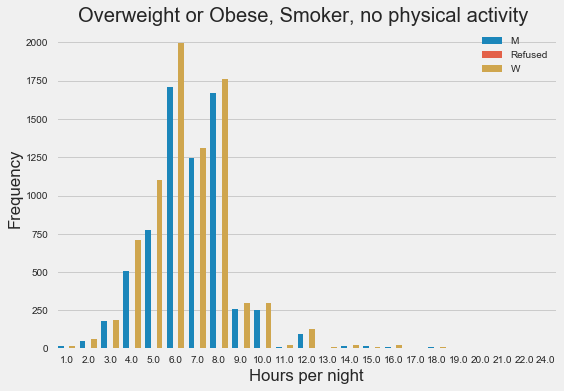

In [241]:
ax = sns.countplot(x="sleepH", hue="sex", data=df_2016_risks)
ax.set_title("Overweight or Obese, Smoker, no physical activity ")
ax.set_xlabel("Hours per night")
ax.set_ylabel('Frequency')
ax.legend(loc=1)

### Dummy code method 


In [242]:
df_2016_S = df_2016[['bmi','sleep','smoker']]
df_2016_d = pd.get_dummies(df_2016_S)
df_2016_d.head()

,bmi_Blank,bmi_Normal Weight,bmi_Obese,bmi_Overweight,bmi_Underweight,sleep_False,sleep_True,smoker_N,smoker_Y,smoker_refused/unknown
0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0
2,0,1,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,1,0,0
4,0,1,0,0,0,1,0,1,0,0


In [243]:
df_2016_d[['sleep_False','bmi_Obese','bmi_Overweight','smoker_Y']].corr()

,sleep_False,bmi_Obese,bmi_Overweight,smoker_Y
sleep_False,1.000000,0.065955,-0.016895,0.103122
bmi_Obese,0.065955,1.000000,-0.439549,-0.011120
bmi_Overweight,-0.016895,-0.439549,1.000000,-0.007301
smoker_Y,0.103122,-0.011120,-0.007301,1.000000


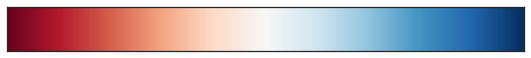

In [244]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

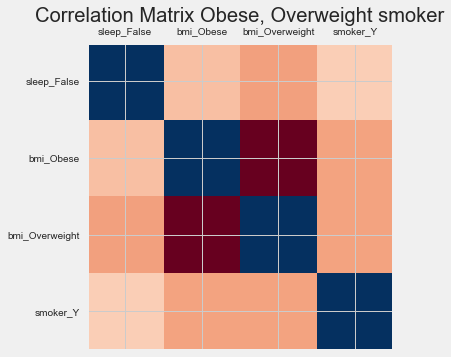

In [245]:
plt.matshow(df_2016_d[['sleep_False','bmi_Obese','bmi_Overweight','smoker_Y']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix Obese, Overweight smoker")
plt.xticks(range(4), ['sleep_False','bmi_Obese','bmi_Overweight','smoker_Y'])
plt.yticks(range(4), ['sleep_False','bmi_Obese','bmi_Overweight','smoker_Y']);


The highest correlation is with  "Insufficient sleep" and Smoker but is very low = 0.103122

## Short sleep and Income

Let's analize the distributions between short sleep and income.


In [246]:
final_y_tot= final.groupby(['y','income','sleep']).size().unstack().reset_index()
final_y_tot['Tot']  =  final_y_tot['False'] + final_y_tot['True']
final_y_tot['% short sleep'] =  round(final_y_tot['False'] / final_y_tot['Tot']*100,2)
final_y_tot['% sleep ok'] =  round(final_y_tot['True'] / final_y_tot['Tot']*100,2)
final_y_tot.sort_values(by=['y','% short sleep'])

sleep,y,income,False,True,Tot,% short sleep,% sleep ok
4,2013,>50k,52471,127982,180453,29.08,70.92
5,2013,refused/unknown,21083,47356,68439,30.81,69.19
2,2013,35k-50k,19348,41715,61063,31.69,68.31
1,2013,25k-35k,16180,32138,48318,33.49,66.51
0,2013,15k-25k,28019,47396,75415,37.15,62.85
3,2013,<15k,21535,29178,50713,42.46,57.54
10,2014,>50k,49626,129075,178701,27.77,72.23
11,2014,refused/unknown,20354,48316,68670,29.64,70.36
8,2014,35k-50k,17862,39189,57051,31.31,68.69
7,2014,25k-35k,14142,29694,43836,32.26,67.74




It seems that people with a low level of income (<15K) have the highest percentage of insufficent sleep



### Dummy code method 

In [247]:
df_2016_S = df_2016[['income','sleep']]
df_2016_d = pd.get_dummies(df_2016_S)

In [248]:
df_2016_d[['sleep_False','income_15k-25k','income_25k-35k','income_35k-50k','income_<15k']].corr()

,sleep_False,income_15k-25k,income_25k-35k,income_35k-50k,income_<15k
sleep_False,1.000000,0.040163,0.008432,-0.000645,0.067619
income_15k-25k,0.040163,1.000000,-0.128300,-0.150406,-0.123316
income_25k-35k,0.008432,-0.128300,1.000000,-0.117186,-0.096079
income_35k-50k,-0.000645,-0.150406,-0.117186,1.000000,-0.112634
income_<15k,0.067619,-0.123316,-0.096079,-0.112634,1.000000


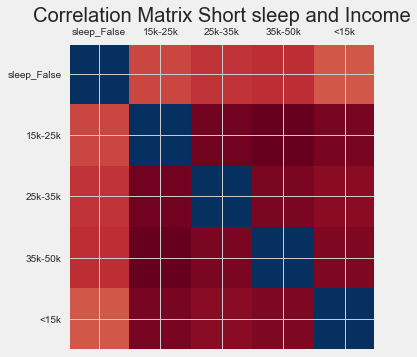

In [253]:
plt.matshow(df_2016_d[['sleep_False','income_15k-25k','income_25k-35k','income_35k-50k','income_<15k']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
plt.title("Correlation Matrix Short sleep and Income")

plt.xticks(range(5), ['sleep_False','15k-25k','25k-35k','35k-50k','<15k'])
plt.yticks(range(5), ['sleep_False','15k-25k','25k-35k','35k-50k','<15k']);

It's seems that Income and Insufficient sleep are not correlated.

## Predictive Model

In [258]:
import scipy.stats as stats

Our problem is a classification and regression problem. I want to identify relationship between output (Insufficient sleep or good sleep) with other variables or features (Gender, Age, Income, Race...). 

We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset.


...work in progress...

## Conclusions

Thanks to this data exploration linked to the "insufficient sleep conditions" and considering the limited amount of time I would like to suggest some example of usefull KPIs to monitor:

- *Country rank*: a composite indicator that measures the well-being of the country based on the combination of health risk factors related to short sleep.


- “Insufficient sleep” rate per 100 thousand population per country

- Variations % of the Average of short sleep duration by country (to display on a map)

- Variations % against “Insufficient sleep” 


- Prevalence of chronic conditions Rate by short sleep  per 100 thousand population per country


- Obesity rate per 100 thousand population per country

- Variations against  Obesity (Body Mass Index ≥30 kg/m2 ) per country


- “Physical inactivity” rate per 100 thousand population per country

- Variations against  “Physical inactivity” per country


- “Currently smoking” rate per 100 thousand population per country

- Variations against “Currently smoking” per country


- “Excessive alcohol” rate per 100 thousand population per country

- Variations against  “Excessive alcohol” per country

If available, we can be combine data from BRFSS with other datasets like the number of incidents by drowsy drivers and define a new kpi:

- Fatal crash Rate by drowsy drivers  per X population by country

- Variation against number of fatal crash  by drowsy drivers % by country


It's necessary to define the target for every KPIs (Highly performing, Under performing,  Not performing).


Every KPI listed below can be filtered using the demographical dimensions: age, sex, race, income, education level.